In [ ]:
# Team Members: Christopher Arraya, Li Hui Cham, Isaac Sparrow, Anki Shenoy, Leonard Yang, Nicholas Wong, Lei Zhang
# connect google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Team-Assignment-1

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/488/Team-Assignment-1


In [ ]:
!unzip Zillow-ChapelHill-Spring2023-18k-Properties.json.zip
!ls

Archive:  Zillow-ChapelHill-Spring2023-18k-Properties.json.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Zillow-ChapelHill-Spring2023-18k-Properties.json.zip or
        Zillow-ChapelHill-Spring2023-18k-Properties.json.zip.zip, and cannot find Zillow-ChapelHill-Spring2023-18k-Properties.json.zip.ZIP, period.
cluster_map.html  Zillow-ChapelHill-Spring2023-18k-Properties.json.zip


## Loading Data
Import Zillow data from .json file.


In [ ]:
import json
import pandas as pd

# First, Load the JSON file and convery it to a pandas data frame
filepath = 'Zillow-ChapelHill-Spring2023-18k-Properties.json'
with open(filepath) as f:
  data = json.load(f)
data.keys()

dict_keys(['zpid', 'address', 'bedrooms', 'bathrooms', 'price', 'yearBuilt', 'longitude', 'latitude', 'homeStatus', 'description', 'livingArea', 'currency', 'homeType', 'datePostedString', 'daysOnZillow', 'zestimate', 'rentZestimate', 'listedBy', 'timeOnZillow', 'pageViewCount', 'favoriteCount', 'isZillowOwned', 'priceHistory', 'isPremierBuilder', 'primaryPublicVideo', 'tourViewCount', 'postingContact', 'comingSoonOnMarketDate', 'timeZone', 'newConstructionType', 'lastSoldPrice', 'contingentListingType', 'restimateLowPercent', 'restimateHighPercent', 'brokerId', 'parcelId', 'isPreforeclosureAuction', 'listingProvider', 'marketingName', 'building', 'priceChange', 'lotSize', 'propertyTaxRate', 'whatILove', 'isFeatured', 'openHouseSchedule', 'brokerageName', 'taxHistory', 'abbreviatedAddress', 'isRecentStatusChange', 'isNonOwnerOccupied', 'buildingId', 'rentalApplicationsAcceptedType', 'tourEligibility', 'url', 'photos', 'chanceToSellFaster', 'dateSold', 'dateSoldString', 'taxAssessedValu

## Dataset
Inspect the given Zillow dataset.

In [ ]:
# prompt: convert data into a pandas dataframe

import pandas as pd
df = pd.DataFrame(data)
# prompt: Using dataframe df: drop rows of df for which latitude or longitude are 2 or more standard deviations from the mean.
df = df[(df.latitude - df.latitude.mean()).abs() < 2 * df.latitude.std()]
df = df[(df.longitude - df.longitude.mean()).abs() < 2 * df.longitude.std()]
df.head()

,zpid,address,bedrooms,bathrooms,price,yearBuilt,longitude,latitude,homeStatus,description,...,chanceToSellFaster,dateSold,dateSoldString,taxAssessedValue,taxAssessedYear,hoaFee,mortgageRates,isListedByOwner,moveInReady,moveInCompletionDate
7,5703217,"{'streetAddress': '401 Copperline Dr', 'city':...",3.000,3.000,418000,1997.000,-79.066,35.883,SOLD,Stunning end unit! This huge Townhome will not...,...,None,1603324800000.000,2020-10-22,353600.000,2022.000,105.000,{'thirtyYearFixedRate': 6.272},NaN,NaN,None
51,6383893,"{'streetAddress': '223 Hillcrest Rd', 'city': ...",5.000,4.500,905675,1915.000,-78.656,35.786,OTHER,PRICED BELOW APPRAISAL !INSTANT EQUITY with th...,...,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,None
52,6383998,"{'streetAddress': '210 Meadow Dr', 'city': 'Ca...",3.000,3.000,505600,1964.000,-78.778,35.777,OTHER,No updates needed here! Downtown Cary gem has ...,...,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,None
55,6419783,"{'streetAddress': '306 Hemlock St', 'city': 'C...",NaN,2.000,353600,1973.000,-78.796,35.791,OTHER,"This is a 1756 square foot, 2.0 bathroom, sing...",...,None,NaN,,254044.000,2022.000,NaN,{'thirtyYearFixedRate': 6.251},NaN,NaN,None
57,6445651,"{'streetAddress': '316 Brooks St', 'city': 'Ho...",NaN,1.000,215800,1974.000,-78.830,35.652,OTHER,"This is a 1012 square foot, 1.0 bathroom, sing...",...,None,973209600000.000,2000-11-03,147481.000,2022.000,NaN,{'thirtyYearFixedRate': 6.2},NaN,NaN,None


In [ ]:
print(df.shape[0])

18018


## Feature Selection

After our group discussion, we decide to only select `zipid` , `address` , `zestimate` , `rentZestimate` , `longitude` , `latitude` , `propertyTaxRate` , `hoaFee`  and `taxAssessedValue`  as our features.

This feature selection process can help reduce potential overfitting issue during training.

In [ ]:
# select relevant features

df_clean = df[['zpid', 'address', 'zestimate', 'rentZestimate', 'longitude', 'latitude', 'propertyTaxRate', 'hoaFee', 'taxAssessedValue', 'price']]
df_clean.head()


,zpid,address,zestimate,rentZestimate,longitude,latitude,propertyTaxRate,hoaFee,taxAssessedValue,price
7,5703217,"{'streetAddress': '401 Copperline Dr', 'city':...",514900.000,2269.000,-79.066,35.883,1.190,105.000,353600.000,418000
51,6383893,"{'streetAddress': '223 Hillcrest Rd', 'city': ...",NaN,5813.000,-78.656,35.786,0.870,NaN,NaN,905675
52,6383998,"{'streetAddress': '210 Meadow Dr', 'city': 'Ca...",505600.000,2123.000,-78.778,35.777,0.870,NaN,NaN,505600
55,6419783,"{'streetAddress': '306 Hemlock St', 'city': 'C...",353600.000,1832.000,-78.796,35.791,0.870,NaN,254044.000,353600
57,6445651,"{'streetAddress': '316 Brooks St', 'city': 'Ho...",215800.000,1815.000,-78.830,35.652,0.870,NaN,147481.000,215800


## Data Imputation

We noticed some observations have NaN values in `hoaFee` , `taxAssessedValue` , `propertyTaxRate`  and `zestimate` , hence we perform data imputation on them.

Since it is possible to have $0 for `hoaFee`, we fill the NaN values in `hoaFee` with 0. However, for `taxAssessedValue` , `propertyTaxRate`  and `zestimate` , we replaced the NaN values of these variables with median as they are continuous data.

If `taxAssessedValue` is 0, we replace it with `zestimate`  multiply by .7, which is the average tax rate.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df_clean['hoaFee'].fillna(0, inplace=True)
# Proceed with the imputation of missing values
columns_to_impute = ['taxAssessedValue', 'propertyTaxRate', 'zestimate']
imputer = SimpleImputer(strategy='median')
df_clean[columns_to_impute] = imputer.fit_transform(df_clean[columns_to_impute])

df_clean.head()

<ipython-input-201-de1681e0cb33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hoaFee'].fillna(0, inplace=True)
<ipython-input-201-de1681e0cb33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_to_impute] = imputer.fit_transform(df_clean[columns_to_impute])


,zpid,address,zestimate,rentZestimate,longitude,latitude,propertyTaxRate,hoaFee,taxAssessedValue,price
7,5703217,"{'streetAddress': '401 Copperline Dr', 'city':...",514900.000,2269.000,-79.066,35.883,1.190,105.000,353600.000,418000
51,6383893,"{'streetAddress': '223 Hillcrest Rd', 'city': ...",597800.000,5813.000,-78.656,35.786,0.870,0.000,402500.000,905675
52,6383998,"{'streetAddress': '210 Meadow Dr', 'city': 'Ca...",505600.000,2123.000,-78.778,35.777,0.870,0.000,402500.000,505600
55,6419783,"{'streetAddress': '306 Hemlock St', 'city': 'C...",353600.000,1832.000,-78.796,35.791,0.870,0.000,254044.000,353600
57,6445651,"{'streetAddress': '316 Brooks St', 'city': 'Ho...",215800.000,1815.000,-78.830,35.652,0.870,0.000,147481.000,215800


In [ ]:
# prompt: If 'taxAssessedValue' is equal to 0, replace it with the 'zestimate' multiplied by .7

df_clean['taxAssessedValue'] = df_clean.apply(lambda x: x['zestimate'] * 0.7 if x['taxAssessedValue'] == 0 else x['taxAssessedValue'], axis=1)


<ipython-input-202-dd52730ef5f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['taxAssessedValue'] = df_clean.apply(lambda x: x['zestimate'] * 0.7 if x['taxAssessedValue'] == 0 else x['taxAssessedValue'], axis=1)


## Feature Engineering

We created 3 new features : `mortgageValue` , `propertyTaxValue` and `cashFlowRatio`  using the existing variables in the dataset.


In [ ]:
# create new variables - mortgageValue, propertyTaxValue, cashFlowRatio

import pandas as pd

# ... your existing code to load df_clean ...

# Assuming the interest rate is a fixed value of 6.5% and a 30-year fixed loan, below is the
# adjusted annual interest rate- plugged into this equation:  https://www.investopedia.com/terms/f/fixed-rate_mortgage.asp
interest_rate = 0.00632

# Calculate the mortgageValue assuming that the investor puts 20% down for the down-payment
df_clean['mortgageValue'] = df_clean['zestimate'] * 0.8 * interest_rate

# Calculate the propertyTax
df_clean['propertyTaxValue'] = ((df_clean['propertyTaxRate']/100) * df_clean['taxAssessedValue']) / 12

# Calculate the cashFlow
df_clean['cashFlowRatio'] = df_clean['rentZestimate'] / (df_clean['mortgageValue'] + df_clean['hoaFee'] + df_clean['propertyTaxValue'])

df_clean.head()

<ipython-input-203-f6f4aab090d6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mortgageValue'] = df_clean['zestimate'] * 0.8 * interest_rate
<ipython-input-203-f6f4aab090d6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['propertyTaxValue'] = ((df_clean['propertyTaxRate']/100) * df_clean['taxAssessedValue']) / 12
<ipython-input-203-f6f4aab090d6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,zpid,address,zestimate,rentZestimate,longitude,latitude,propertyTaxRate,hoaFee,taxAssessedValue,price,mortgageValue,propertyTaxValue,cashFlowRatio
7,5703217,"{'streetAddress': '401 Copperline Dr', 'city':...",514900.000,2269.000,-79.066,35.883,1.190,105.000,353600.000,418000,2603.334,350.653,0.742
51,6383893,"{'streetAddress': '223 Hillcrest Rd', 'city': ...",597800.000,5813.000,-78.656,35.786,0.870,0.000,402500.000,905675,3022.477,291.812,1.754
52,6383998,"{'streetAddress': '210 Meadow Dr', 'city': 'Ca...",505600.000,2123.000,-78.778,35.777,0.870,0.000,402500.000,505600,2556.314,291.812,0.745
55,6419783,"{'streetAddress': '306 Hemlock St', 'city': 'C...",353600.000,1832.000,-78.796,35.791,0.870,0.000,254044.000,353600,1787.802,184.182,0.929
57,6445651,"{'streetAddress': '316 Brooks St', 'city': 'Ho...",215800.000,1815.000,-78.830,35.652,0.870,0.000,147481.000,215800,1091.085,106.924,1.515


## More Data Cleaning

We realised that some observations have price that is too low (e.g. $1) and this can inflate our cashFlowRatio, hence we dropped those observations and check our dataset again.

In [ ]:
# prompt: show five observations with cashFlowRatio more than 1 and hoaFee not 0

df_clean[ (df_clean['cashFlowRatio'] > 1) & (df_clean['hoaFee'] != 0) ].head()

# we notice that some price is 1 or 0 , hence it inflates the cashFlowRatio


,zpid,address,zestimate,rentZestimate,longitude,latitude,propertyTaxRate,hoaFee,taxAssessedValue,price,mortgageValue,propertyTaxValue,cashFlowRatio
234,49995341,"{'streetAddress': '312 Nottingham Dr', 'city':...",597800.000,6723.000,-79.002,35.926,1.220,6.000,944413.000,944413,3022.477,960.153,1.686
290,49995403,"{'streetAddress': '428 Nottingham Dr', 'city':...",597800.000,6738.000,-79.001,35.921,1.220,7.000,995777.000,995777,3022.477,1012.373,1.667
358,49995605,"{'streetAddress': '4100 Five Oaks Dr', 'city':...",309800.000,2100.000,-78.989,35.943,1.220,171.000,149380.000,315000,1566.349,151.870,1.112
359,49995628,"{'streetAddress': '4100 Five Oaks Dr', 'city':...",291700.000,2100.000,-78.989,35.943,1.220,171.000,158944.000,291700,1474.835,161.593,1.162
360,49995709,"{'streetAddress': '4318 Beechnut Ln', 'city': ...",275700.000,1999.000,-78.988,35.940,1.220,190.000,152629.000,275700,1393.939,155.173,1.149


In [ ]:
# prompt: how many observations  has price = 1

df_clean[df_clean['zestimate'] == 1].shape[0]


0

In [ ]:
# prompt: drop observations that have price = 1

df_clean = df_clean[df_clean['zestimate'] != 1]


In [ ]:
df_clean = df_clean[df_clean['taxAssessedValue'] > 1]

In [ ]:
# look at the dataframe again
df_clean[ (df_clean['cashFlowRatio'] > 1) & (df_clean['hoaFee'] != 0) ].head()

,zpid,address,zestimate,rentZestimate,longitude,latitude,propertyTaxRate,hoaFee,taxAssessedValue,price,mortgageValue,propertyTaxValue,cashFlowRatio
234,49995341,"{'streetAddress': '312 Nottingham Dr', 'city':...",597800.000,6723.000,-79.002,35.926,1.220,6.000,944413.000,944413,3022.477,960.153,1.686
290,49995403,"{'streetAddress': '428 Nottingham Dr', 'city':...",597800.000,6738.000,-79.001,35.921,1.220,7.000,995777.000,995777,3022.477,1012.373,1.667
358,49995605,"{'streetAddress': '4100 Five Oaks Dr', 'city':...",309800.000,2100.000,-78.989,35.943,1.220,171.000,149380.000,315000,1566.349,151.870,1.112
359,49995628,"{'streetAddress': '4100 Five Oaks Dr', 'city':...",291700.000,2100.000,-78.989,35.943,1.220,171.000,158944.000,291700,1474.835,161.593,1.162
360,49995709,"{'streetAddress': '4318 Beechnut Ln', 'city': ...",275700.000,1999.000,-78.988,35.940,1.220,190.000,152629.000,275700,1393.939,155.173,1.149


In [ ]:
df_clean.head()

,zpid,address,zestimate,rentZestimate,longitude,latitude,propertyTaxRate,hoaFee,taxAssessedValue,price,mortgageValue,propertyTaxValue,cashFlowRatio
7,5703217,"{'streetAddress': '401 Copperline Dr', 'city':...",514900.000,2269.000,-79.066,35.883,1.190,105.000,353600.000,418000,2603.334,350.653,0.742
51,6383893,"{'streetAddress': '223 Hillcrest Rd', 'city': ...",597800.000,5813.000,-78.656,35.786,0.870,0.000,402500.000,905675,3022.477,291.812,1.754
52,6383998,"{'streetAddress': '210 Meadow Dr', 'city': 'Ca...",505600.000,2123.000,-78.778,35.777,0.870,0.000,402500.000,505600,2556.314,291.812,0.745
55,6419783,"{'streetAddress': '306 Hemlock St', 'city': 'C...",353600.000,1832.000,-78.796,35.791,0.870,0.000,254044.000,353600,1787.802,184.182,0.929
57,6445651,"{'streetAddress': '316 Brooks St', 'city': 'Ho...",215800.000,1815.000,-78.830,35.652,0.870,0.000,147481.000,215800,1091.085,106.924,1.515


In [ ]:
# prompt: drop nan and inf from cashflowratio column in df_clean dataset

import numpy as np
df_clean = df_clean.dropna(subset=['cashFlowRatio'])
df_clean = df_clean[df_clean['cashFlowRatio'] != np.inf]


## Exploratory Data Analysis

We performed EDA on our cleaned dataset (`df_clean`) to check for any patterns and trends.

We use histogram to visualise numerical and continuous data. Since `cashFlowRatio` is a computed ratio, we take the logarithm of the ratios instead of using the raw ratio values that is highly skewed. This makes the graph more interpretable.

We also check the linearity of the `rentZestimate` with our target variable `cashFlowRatio` so our linear regression assumptions hold.

We also use a correlation heatmap to check for correlation between our features, to avoid any multicollinearity issues when modeling.


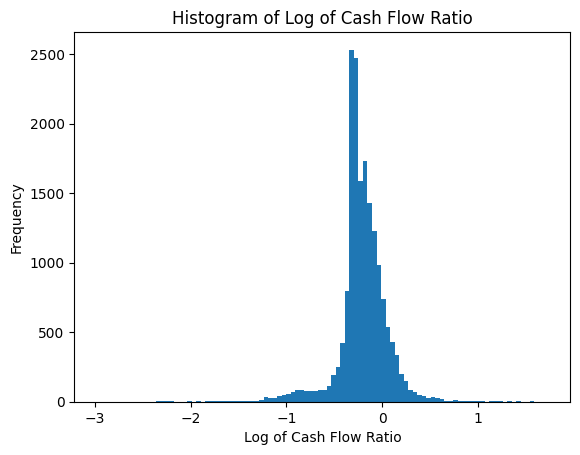

In [ ]:
# prompt: can we visualise a histogram for the log of ratio?

import numpy as np
import matplotlib.pyplot as plt
df_clean['log_ratio'] = np.log(df_clean['cashFlowRatio'])
plt.hist(df_clean['log_ratio'], bins=100)
plt.xlabel('Log of Cash Flow Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Log of Cash Flow Ratio')
plt.show()

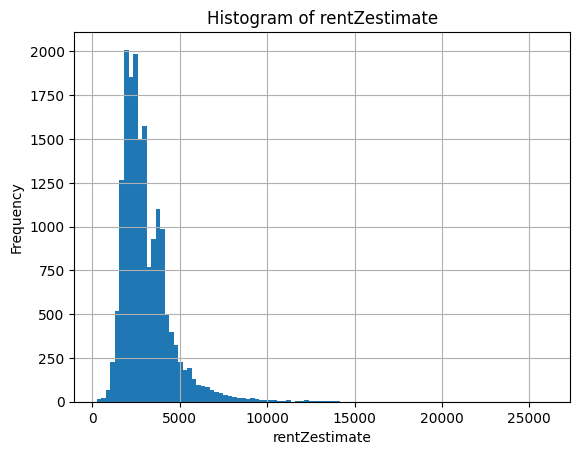

In [ ]:
# Visualise the rentZestimate variable

df_clean['rentZestimate'].hist(bins=100)
plt.xlabel('rentZestimate')
plt.ylabel('Frequency')
plt.title('Histogram of rentZestimate')
plt.show()

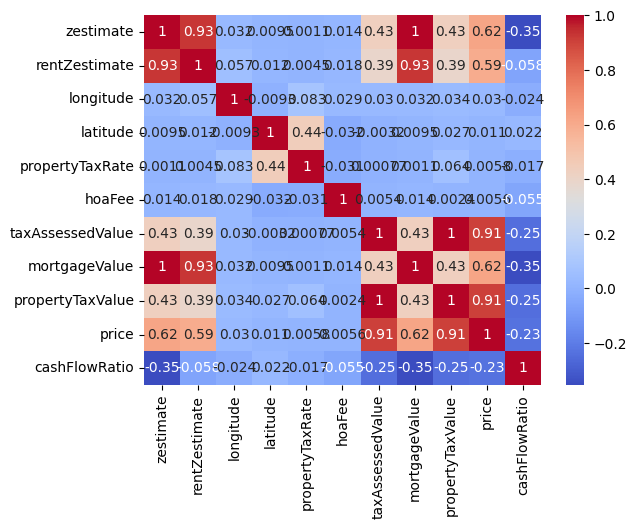

In [ ]:
# prompt: generate a correlation heatmap for the df_clean

import matplotlib.pyplot as plt
import seaborn as sns

corr = df_clean[['zestimate', 'rentZestimate', 'longitude', 'latitude', 'propertyTaxRate', 'hoaFee', 'taxAssessedValue', 'mortgageValue', 'propertyTaxValue', 'price', 'cashFlowRatio']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Linear Regression Model

In this section, we implement Linear regression and LASSO regression (a penalized linear regression) for `cashFlowRatio` prediction. Cash flow ratio is calculated as `rentZestimate`/`mortgageValue` + `hoaFee` + `propertyTaxValue`.

However, in the original dataframe without data imputation, approximately 1 in 6 (3320/18018) observations are missing a
`taxAssessedValue` measurement. Additionally, approximately 1 in 9 (1902/18018) observations are missing a `zestimate` measurement (used to define `mortgageValue`).




In [ ]:
print(df['taxAssessedValue'].isna().sum())
print(df['zestimate'].isna().sum())

3320
1902



For an observation lacking these key metrics, calculation of `cashFlowRatio` is not possible due to the lacking features. It would also result in a divison by 0.

Hence, we propose 2 different linear regression models for `cashFlowRatio` prediction of Zillow listings in Chapel Hill that can circumvent these issues as an alternative to data imputation - particularly useful for forecasting `cashFlowRatio` when access to `taxAssessedValue` or `zestimate` measurements are unavailable.

First, we implement an OLS multiple regression model as our baseline. The target variable is `cashFlowRatio`  and the features we use to predict the target variable are `rentZestimate` , `hoaFee` and `price` . Linear regression model attempts to find the best fitting line that can describe the relationship between the predictors and the target variable.

Here are some assumptions for linear regression.

1. We assume a linear relationship between the features and target variable.
2. Homoscedasticity - residuals have constant variance across the regression line.
3. Residual errors should be normally distributed.
4. There is little to no multicollinearity in the data.

In [ ]:
# Linear Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

lin_reg_features = ['rentZestimate','hoaFee', 'price']
X = df_clean[lin_reg_features]
y = df_clean['cashFlowRatio']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Standardize features for mse comparison with penalized regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", linear_mse)
print("R^2 Score:", linear_r2)

# Model coefficients
print("Model coefficients:", model.coef_)


Mean Squared Error: 0.04534308573279551
R^2 Score: 0.09327249947237293
Model coefficients: [ 0.02417222 -0.01406032 -0.06822539]


# LASSO Regression

We implement our second linear regression model - a LASSO regression. This is a linear regression with an L1 regularization penalty. We implement LASSO to see if feature selection is necessary due to multicollinearity.

We'll first tune the LASSO model with repeated 10-fold CV for a range of 100 λ values. Then, we fit a LASSO regression model with the optimal λ, selected after a process of cross-validation, and compute R-squared. The MSE obtained from LASSO regression will then be compared to our baseline measurement from linear regression.

In [ ]:
from numpy import arange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold

# Define lasso regression model
rdg = Lasso()

# 5-repeated 10-fold cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=88)

# Lambda grid for penalties (we're testing lambda values 0-1 in 0.01 increments)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# Search definition for hyperparameter tuning
search = GridSearchCV(rdg, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Tuning lambda hyperparameter
results = search.fit(X_train_scaled, y_train)

# summarize results
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

optimal_lambda = results.best_params_['alpha']

MAE: -0.135
Config: {'alpha': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.747e+02, tolerance: 7.996e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_c


Now, we implement LASSO with the optimal λ and compare test MSE with the unpenalized linear regression.


In [ ]:
# Fit LASSO
reg = Lasso(alpha = optimal_lambda)
reg.fit(X_train_scaled, y_train)

# Test MSE
pred = reg.predict(X_test_scaled)
lasso_mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(lasso_mse_test, 2))

<ipython-input-217-89cd844504fc>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train_scaled, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MSE test set 0.05


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.747e+02, tolerance: 7.996e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Compared to the unpenalized linear regression model, we see that the lasso regression model obtains a comparable MSE - this is evidenced by the process of hyperparameter tuning where a λ value of 0 was selected (equivalent to least squares). Regularization is not needed as the model is already dense.

# MSE comparison for regressions

We now visualize the test MSE for our 2 linear regression models.

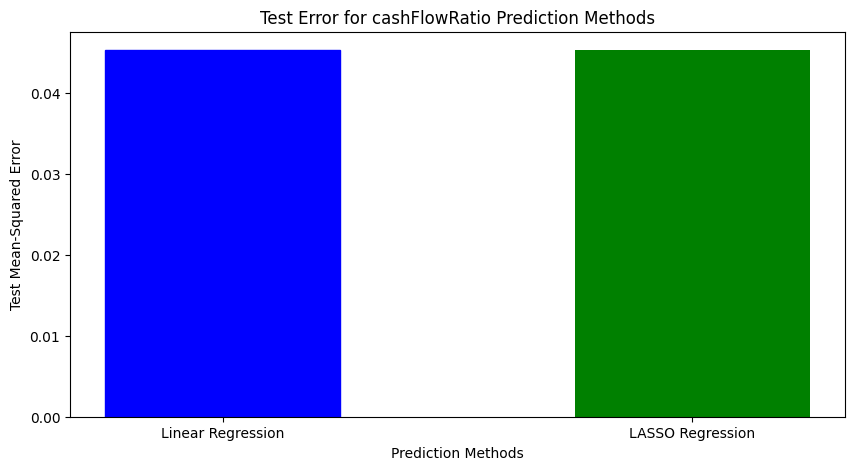

In [ ]:
import matplotlib.pyplot as plt

data = {'Linear Regression': linear_mse, 'LASSO Regression': lasso_mse_test}

methods = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

bars = plt.bar(methods, values, color = 'green', width = 0.5)
bars[0].set_color('blue')

plt.xlabel("Prediction Methods")
plt.ylabel("Test Mean-Squared Error")
plt.title("Test Error for cashFlowRatio Prediction Methods")
plt.show()

# K-means Clustering
In this section we use K-means clustering to categorize the Zillow.com property listings based on latitude, longitude, zestimate, hoaFee, taxAssedValue, rentZestimate, propertyTaxValue, and cashFlowRatio. We begin by using the elbow method to find the elbow point for the ideal k value of 6 to use for our analysis. We then mapped out the clusters using PCA and on a map to see the geographical spread of the similarly classified listings.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

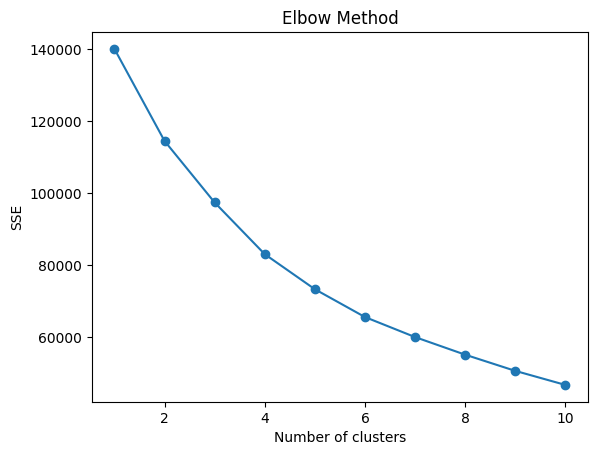

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features = ['latitude', 'longitude', 'zestimate', 'hoaFee', 'taxAssessedValue', 'rentZestimate', 'propertyTaxValue', 'cashFlowRatio']

# Handle missing values, if any
X = df_clean[features]
X = X.fillna(0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Set pandas option to avoid scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)

# Choose the number of clusters (k) based on the plot, then apply K-means
k_optimal = 6  # based on visual inspection of the Elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_clean['Cluster'] = clusters  # This line adds the cluster labels to the DataFrame

# Analyze cluster characteristics
cluster_means = df_clean.groupby('Cluster')[features].median()
cluster_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,latitude,longitude,zestimate,hoaFee,taxAssessedValue,rentZestimate,propertyTaxValue,cashFlowRatio
Cluster,,,,,,,,
0,35.917,-79.040,1336100.000,0.000,889150.000,5735.000,878.517,0.742
1,35.940,-79.052,703200.000,0.000,457400.000,3200.000,454.282,0.759
2,35.899,-79.010,832000.000,36450.000,553820.000,3894.000,551.573,0.090
3,35.927,-79.020,381000.000,0.000,278350.000,2125.000,275.832,0.960
4,35.929,-79.032,597800.000,0.000,9681000.000,1374.000,9600.325,0.101
5,35.888,-79.116,553800.000,0.000,372900.000,2384.000,326.556,0.805


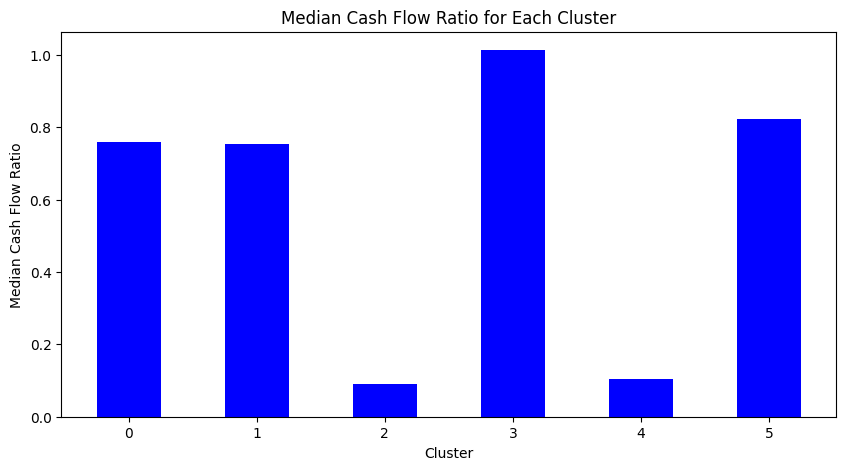

In [ ]:
# prompt: make a bar chart with the cashflow ratio of each cluster

# Calculate the average cashFlowRatio for each cluster
cluster_cashflow_ratios = df_clean.groupby('Cluster')['cashFlowRatio'].mean()

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(cluster_cashflow_ratios.index, cluster_cashflow_ratios.values, color='blue', width=0.5)
plt.xlabel("Cluster")
plt.ylabel("Median Cash Flow Ratio")
plt.title("Median Cash Flow Ratio for Each Cluster")
plt.show()


In [ ]:
# Calculate the count of each cluster
df_clean['Cluster'].value_counts().sort_index()

0    1634
1    7737
2       2
3    5022
4      13
5    3091
Name: Cluster, dtype: int64

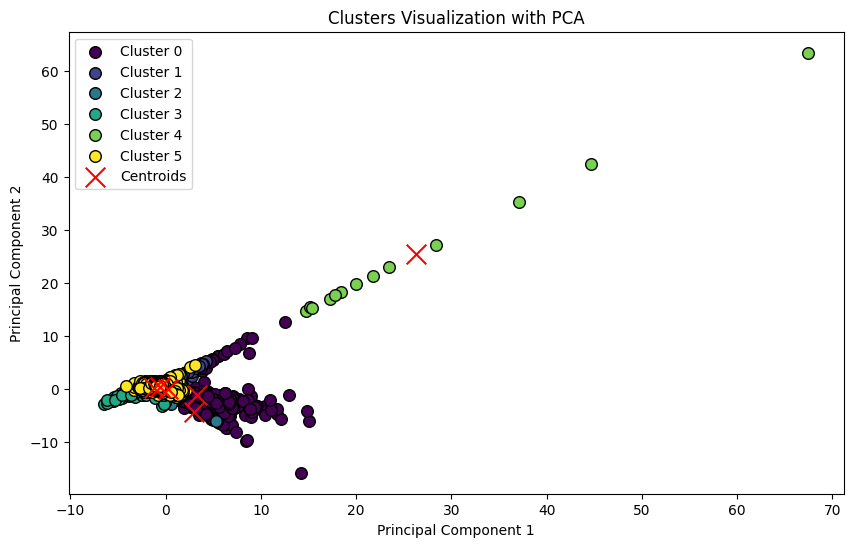

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_labels = kmeans.labels_

# Plotting the clusters with a loop to assign labels for the legend
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, k_optimal))  # Use 'k_optimal' to generate colors

for i in range(k_optimal):  # Iterate through the range of k_optimal clusters
    # Select data points that belong to the current cluster
    xi = X_pca[cluster_labels == i]
    plt.scatter(xi[:, 0], xi[:, 1], color=colors[i], edgecolor='k', s=70, label=f'Cluster {i}')

plt.title('Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot centroids
centroids = pca.transform(kmeans.cluster_centers_)  # Use 'kmeans' to access cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.legend()
plt.show()



In [ ]:
# Percentage of the Cash Flow Positive Cluster

6569/15686

0.4187810786688767

<ipython-input-230-6c66dca45b34>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')
<ipython-input-230-6c66dca45b34>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['longitude'], cluster_data['latitude'], c=cmap(i), label='Cluster {}'.format(i))


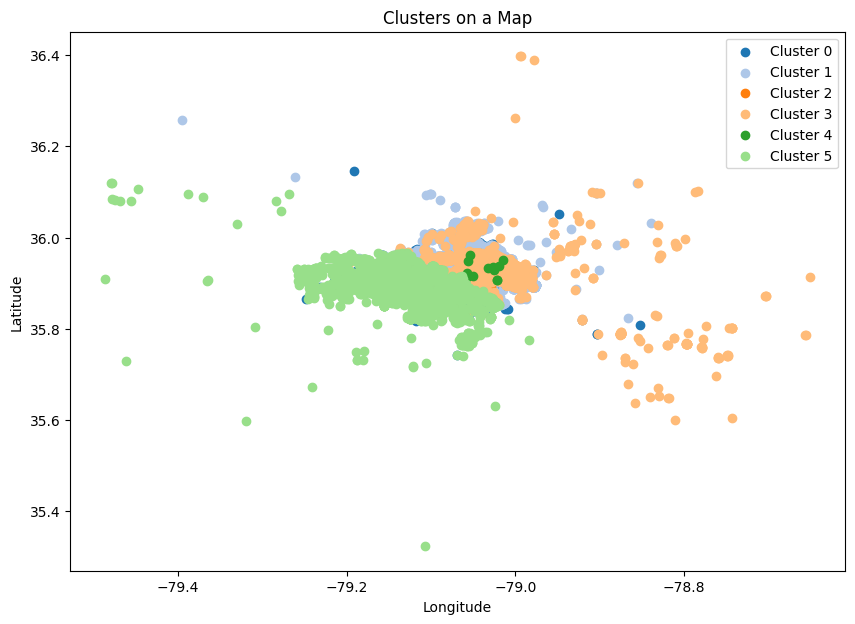

In [ ]:
# prompt: show the clusters on a map

# Add cluster labels to the DataFrame
df_clean['Cluster'] = kmeans.labels_

# Define color map
cmap = plt.cm.get_cmap('tab20')

# Create a scatter plot with clusters colored
plt.figure(figsize=(10, 7))
for i in range(k_optimal):
    cluster_data = df_clean[df_clean['Cluster'] == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], c=cmap(i), label='Cluster {}'.format(i))
plt.title('Clusters on a Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


# Anomaly Detection
Here we use isolation forest to help us see anomalies in the dataset. Using this information we calculated the relevant statistics for the anomalies to understand how they may be affecting our cluster analysis.

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(X_scaled)

# Anomalies are marked as -1, normal points are marked as 1
df_clean['Anomaly'] = anomalies

# Count the number of anomalies detected
anomaly_count = (anomalies == -1).sum()

# Summarize the clustering result and the anomaly detection
anomaly_summary = anomaly_count, df_clean[df_clean['Anomaly'] == -1]['cashFlowRatio'].describe()

print("\nAnomalies details:")
print(df_clean[df_clean['Anomaly'] == -1].head())


Anomalies details:
         zpid                                            address   zestimate  \
232  49995339  {'streetAddress': '304 Nottingham Dr', 'city':... 2340800.000   
233  49995340  {'streetAddress': '308 Nottingham Dr', 'city':... 1912700.000   
235  49995342  {'streetAddress': '400 Nottingham Dr', 'city':... 2521700.000   
241  49995348  {'streetAddress': '404 Nottingham Dr', 'city':... 1866800.000   
300  49995414  {'streetAddress': '108 Donegal Dr', 'city': 'C... 3596500.000   

     rentZestimate  longitude  latitude  propertyTaxRate  hoaFee  \
232      11170.000    -79.003    35.927            1.220   6.000   
233       9289.000    -79.002    35.927            1.220   6.000   
235      12503.000    -79.001    35.924            1.220   8.000   
241       8902.000    -79.001    35.924            1.220   8.000   
300      17706.000    -79.005    35.921            1.220   0.000   

     taxAssessedValue    price  mortgageValue  propertyTaxValue  \
232       1868039.000  

In [ ]:
# Calculate the mean of each feature for non-anomalous data points
normal_means = df_clean[df_clean['Anomaly'] == 1].mean()

# Calculate the mean of each feature for anomalous data points
anomaly_means = df_clean[df_clean['Anomaly'] == -1].mean()

# Create a DataFrame to compare the means
comparison_df = pd.DataFrame({'Normal Mean': normal_means, 'Anomaly Mean': anomaly_means})

# Calculate the percentage difference between the Normal Mean and Anomaly Mean
comparison_df['% Difference'] = (comparison_df['Anomaly Mean'] - comparison_df['Normal Mean']) / comparison_df['Normal Mean'] * 100

# Sort the features by the absolute percentage difference in descending order
comparison_df = comparison_df.reindex(comparison_df['% Difference'].abs().sort_values(ascending=False).index)

# Display the features that have the largest differences
print(comparison_df)

                   Normal Mean  Anomaly Mean  % Difference
hoaFee                  36.571       414.086      1032.284
propertyTaxValue       428.852      2516.910       486.895
taxAssessedValue    436800.530   2562946.857       486.755
price               615672.922   3114440.177       405.860
Anomaly                  1.000        -1.000      -200.000
zestimate           654058.855   1907308.571       191.611
mortgageValue         3306.922      9643.352       191.611
rentZestimate         3011.175      8215.183       172.823
log_ratio               -0.204        -0.529       159.138
Cluster                  2.206         0.571       -74.095
zpid             234268205.478 147829183.817       -36.897
cashFlowRatio            0.842         0.713       -15.311
propertyTaxRate          1.178         1.160        -1.583
latitude                35.923        35.931         0.022
longitude              -79.057       -79.059         0.003


<ipython-input-227-be6597e3bae2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normal_means = df_clean[df_clean['Anomaly'] == 1].mean()
<ipython-input-227-be6597e3bae2>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anomaly_means = df_clean[df_clean['Anomaly'] == -1].mean()


In [ ]:
# prompt: What percentage of the data includes cashflowRatio greater than 1?

(df_clean['cashFlowRatio'] > 1).mean() * 100


14.909423395622607

In [ ]:
# prompt: What percentage of the data includes cashFlowRatio greater than 1.5?

(df_clean['cashFlowRatio'] > 1.5).mean() * 100


1.2572146979827419